# Keras

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
# Seed for reproducibility
np.random.seed(42)

# Generate dataset
X = np.array([2 * np.random.random() for _ in range(100)])
y = 4 + 3 * X + np.random.normal(0, 1, size=X.shape)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"trainSize: {len(X_train)}")
print(f"X_train.size: {X_train.shape}; X_train: {X_train}")
print(f"X_test.size: {X_test.shape}; X_test: {X_test}")
print(f"y_train.size: {y_train.shape}; y_train: {y_train}")
print(f"y_test.size: {y_test.shape}; y_test: {y_test}")

# Add bias term to X_train and X_test
X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_b = np.c_[np.ones(X_test.shape[0]), X_test]

# Build model
model = keras.Sequential([
    layers.InputLayer(shape=(X_train_b.shape[1],)),
    layers.Dense(1, use_bias=False, kernel_initializer=tf.keras.initializers.RandomNormal(seed=42))
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mean_squared_error')

# Train model
history = model.fit(X_train_b, y_train, epochs=1000, verbose=0)

# Make predictions
y_train_pred = model.predict(X_train_b)
y_test_pred = model.predict(X_test_b)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_test_pred.flatten())**2)

# Output results
weights = model.layers[0].get_weights()[0].flatten()
print(f"Theta: {weights}")
print(f"Mean Squared Error (MSE): {mse}")


trainSize: 80
X_train.size: (80,); X_train: [1.84374847 1.77442549 0.39934756 0.06877704 1.97377387 0.36680902
 0.24407647 1.04546566 1.41614516 0.01104423 1.9398197  1.04013604
 0.65036664 1.18482914 1.1225544  0.31198904 0.28184845 1.08539217
 1.6167947  0.60848449 0.36970891 1.93126407 1.73235229 0.98759119
 1.02846888 0.58245828 1.24659625 1.57035192 1.65747502 0.42467822
 0.91213997 1.19731697 1.04951286 1.36846605 1.20223002 0.71693146
 0.11616722 0.56186902 0.60922754 0.94442985 0.176985   0.21578285
 1.19579996 1.8186408  1.93916926 1.60439396 0.62342215 0.14910129
 0.54269806 0.85508204 0.23173812 0.99035382 0.09045458 1.09342056
 0.05083825 0.39196572 1.45801434 0.13010319 1.54193436 0.65066066
 0.71350665 0.62196464 0.19534423 0.09290083 1.90142861 1.87899788
 0.27898772 1.46398788 0.73272369 1.27511494 1.42648957 1.41371469
 1.45921236 0.66179605 1.22370579 0.77735458 0.39743136 0.36364993
 1.5215701  1.55026565]
X_test.size: (20,); X_test: [0.1271167  1.7896547  1.54448954

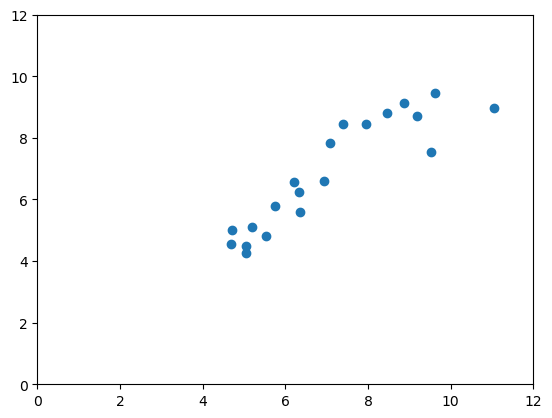

In [9]:
plt.scatter(y_test, y_test_pred)
plt.xlim(0,12)
plt.ylim(0,12)
plt.show()